In [1]:
# Importar pandas e numpy para trabalhar com Dataframes
import pandas as pd
import numpy as np

# Importar pyarrow para ler arquivo parquet
import pyarrow as pa
import  pyarrow.parquet as pq

# Importar matplotlib para gerar os graficos
import matplotlib.pyplot as plt

In [2]:
# Definir o tamanho da fonte das letras nos graficos e o tamanho das figuras
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (10,10)

In [18]:
def init_figure():
    '''
    Inicializa os eixos ("axis") para plotar 4 graficos formando 
    uma matriz 2x2.

    Parameters:
        None

    Returns:
        arrAx: Retorna vetor contendo 4 eixos, um para cada gráfico
    ''' 

    arrAx = [[],[],[],[]]
    fig = plt.figure()
    gs = fig.add_gridspec(2, 2, hspace=0.05, wspace=0.05)
    (arrAx[0], arrAx[1]), (arrAx[2], arrAx[3]) = gs.subplots(sharex='col', sharey='row')

    return arrAx, fig


def set_axes_hist(subject, dfSubject, ax, bins):
    '''
    Configura os eixos ("axis") para plotar o histograma referente
    as notas da area ("subject").

    Parameters:
        subject (str): Codigo da area da prova
        dfSubject (dataframe): Dataframe contendo as notas dos candidatos
        ax (axes): Eixo do grafico
        bins (arr): Array contendo os grupos de valores do histograma 

    Returns:
        None.
    '''
    
    ax.hist(dfSubject[f'{subject}_TRI'], bins, alpha=0.5, label=f'{subject}_TRI')
    ax.hist(dfSubject[f'{subject}_TCT'], bins, alpha=0.5, label=f'{subject}_TCT')
    ax.grid()
    ax.set_ylim([0, 27000])
    ax.legend(prop={'size': 14})


def set_axes_scatter(subject, dfSubject, ax, color):
    '''
    Configura os eixos ("axis") para plotar o grafico de dispersao ("scatter") referente
    ao erro entre a nota do TRI e a nota calculada utilizando o TCT da area ("subject").

    Parameters:
        subject (str): Codigo da area da prova
        dfSubject (dataframe): Dataframe contendo as notas dos candidatos
        ax (axes): Eixo do grafico
        color (str): Cor dos elementos do grafico 

    Returns:
        None.
    '''
    
    ax.scatter(dfSubject[f'{subject}_erro'], dfSubject[f'{subject}_RIGHT_ANSWERS'], alpha=0.5, edgecolors='k', color=color, label=subject)
    ax.grid()
    ax.set_ylim([0,46])
    ax.set_xlim([-450,450])
    ax.set_yticks(range(0, 46, 5))
    ax.legend(prop={'size': 14})
    #ax.set(xlabel='TRI - TCT', ylabel='Quantidade de Acertos')
    #ax.label_outer()

In [4]:
# Ler os arquivo dos datasets contendo as respostas dos candidatos por area
dictResp = {"CN":[], "MT":[], "CH":[], "LC":[]}

for subject in dictResp.keys():
    dictResp[subject] = pd.read_parquet(f'../../Datasets/MICRODADOS_ENEM_2019_SAOPAULO_BySubjectOrdered/{subject}.parquet')

## **Notas x Quantidade de candidatos**

Comparação da quantidade de candidatos que obtiveram cada nota considerando a avaliacao pelo TRI e pelo TCT

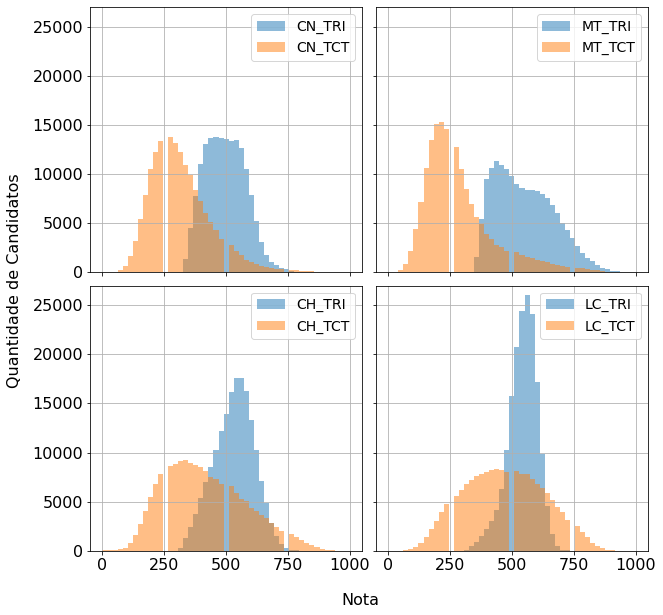

In [24]:
# Inicializar os eixos para o plot
arrAx, fig = init_figure()

fig.text(0.5, 0.05, 'Nota', ha='center')
fig.text(0.01, 0.5, 'Quantidade de Candidatos', va='center', rotation='vertical')

# Definir as "bins" para o plot
bins = np.linspace(0,1000, 50)

# Executa as instruções abaixo para cada uma das areas
for subject in dictResp.keys():
    
    # Renomear as colunas referentes as notas 
    dictResp[subject].rename(columns={f'NU_NOTA_{subject}':f'{subject}_TRI'}, inplace=True)
    
    # Definir array contendo os nomes das colunas de resposta,
    # com o padrao "{area}_{numero da questao}"
    columnsNames = [subject + str(i) for i in range(1, 46)]
    
    # Somar as colunas das questoes preenchidas com  1 (acerto) ou 0 (erro), 
    # e mutiplicar por 1000/45, considerando que a nota maxima e 1000
    dictResp[subject][f'{subject}_RIGHT_ANSWERS'] = dictResp[subject][columnsNames].sum(axis=1)
    dictResp[subject][f'{subject}_TCT'] = dictResp[subject][f'{subject}_RIGHT_ANSWERS'] * 1000.0/45

    # Obter index da area no dicionario para ser utilizado como index no array de eixos 
    idx = list(dictResp.keys()).index(subject)

    # Configurar o eixo para o grafico da area
    set_axes_hist(subject, dictResp[subject], arrAx[idx], bins)

# Plotar o grafico
plt.show()

## **Diferenca de nota x Quantidade de acertos**

Diferenca entre as notas do TRI e TCT (TRI - TCT) para cada candidato considerando quantos acertos obtiveram

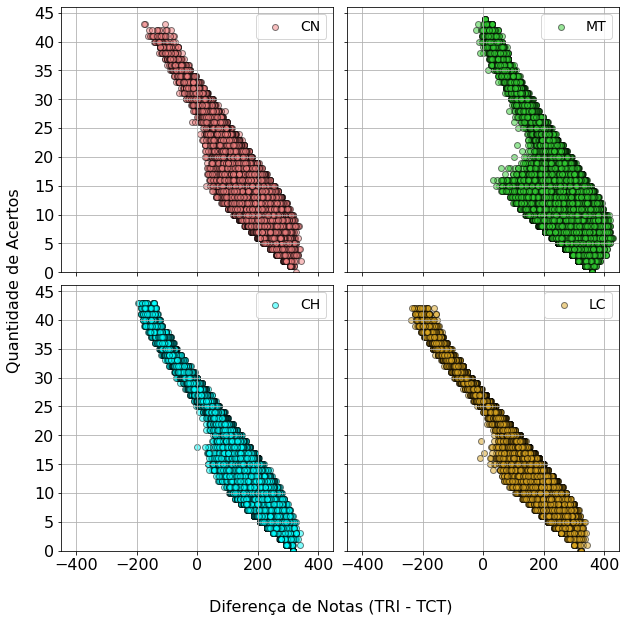

In [27]:
# Inicializar os eixos para o plot
ax, fig = init_figure()

fig.text(0.5, 0.04, 'Diferença de Notas (TRI - TCT)', ha='center')
fig.text(0.05, 0.5, 'Quantidade de Acertos', va='center', rotation='vertical')

# Definir o array de cores para o plot
colors = ["lightcoral", "limegreen", "cyan", "goldenrod"]

# Executa as instruções abaixo para cada uma das areas
for subject in dictResp.keys():
    
    # Calcular a diferenca entre as notas do TRI e TCT
    dictResp[subject][f'{subject}_erro'] = dictResp[subject][f'{subject}_TRI'] - dictResp[subject][f'{subject}_TCT']
    
    # Obter index da area no dicionario para ser utilizado como index no array de eixos 
    idx = list(dictResp.keys()).index(subject)

    # Configurar o eixo para o grafico da area
    set_axes_scatter(subject, dictResp[subject], ax[idx], colors[idx])


# Plotar o grafico
plt.show()

## **Quantidade de notas iguais por area**

Comparacao da quantidade maxima de vezes que uma nota aparece considerando a avaliacao pelo TRI e pelo TCT

In [67]:
# Executa as instruções abaixo para cada uma das areas
for subject in dictResp.keys():

    maxCountTRI = dictResp[subject][f'{subject}_TRI'].value_counts().max()
    maxCountTCT = dictResp[subject][f'{subject}_TCT'].value_counts().max()

    print(f'Maior quantidade de notas iguais para "{subject}" utilizando: ')
    print(f'TRI: {maxCountTRI}')
    print(f'TCT: {maxCountTCT}')
    print("\n")

Maior quantidade de notas iguais para "CN" utilizando: 
TRI: 94
TCT: 13741


Maior quantidade de notas iguais para "MT" utilizando: 
TRI: 75
TCT: 15332


Maior quantidade de notas iguais para "CH" utilizando: 
TRI: 118
TCT: 9230


Maior quantidade de notas iguais para "LC" utilizando: 
TRI: 159
TCT: 8365


